# **Reducción de Dimensionalidad**
**Josefina Valenzuela L.**

*Diplomado Data Engineer*
*USACH*
*(Módulo Machine Learning)*

####Importar librerias

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# **Curse of Dimensionality**

### **Escasez de los datos**
* 1000 puntos en espacios de distintas dimensiones y calcular cuán "lleno" está ese espacio.
* Esta función calcula la densidad como el número de puntos dividido por el volumen del espacio. Usamos un cubo de lado 2, así que el volumen crece como 2**d, donde d es la dimensión.
* 1 hasta 20 dimensiones.



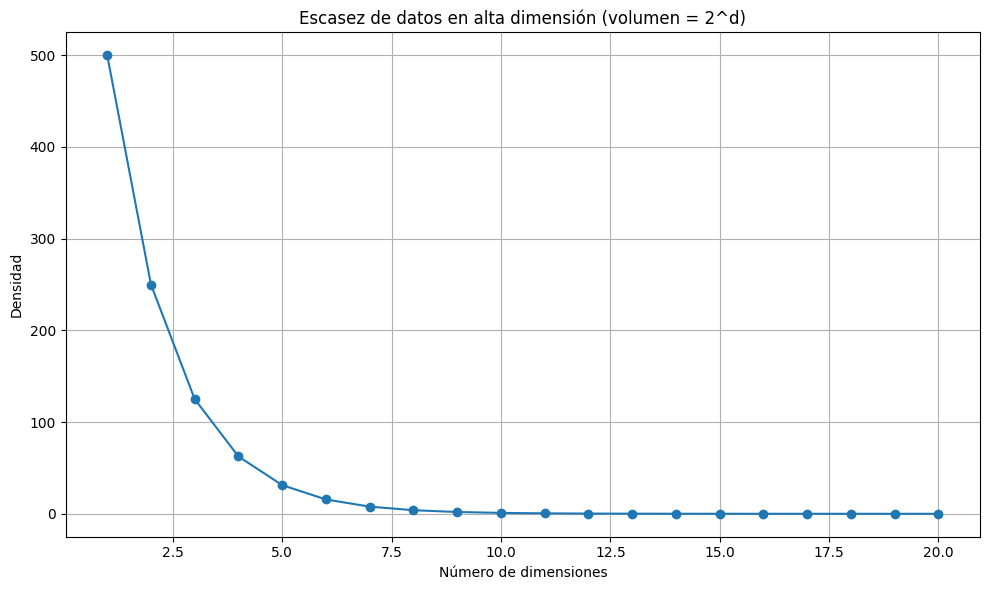

In [ ]:

# Función para calcular densidad con volumen creciente (cubo de lado 2)
def calcular_densidad_volumen_creciente(n_dimensiones, n_puntos=1000):
    densidades = []
    for dim in n_dimensiones:
        volumen = 2 ** dim  # volumen del cubo de lado 2 en dimensión 'dim'
        densidad = n_puntos / volumen
        densidades.append(densidad)
    return densidades

# Dimensiones a evaluar
dimensiones = list(range(1, 21))
densidades = calcular_densidad_volumen_creciente(dimensiones)

# Graficar 1/densidad para mostrar escasez creciente
plt.figure(figsize=(10, 6))
plt.plot(dimensiones, [d for d in densidades], marker='o')
plt.title('Escasez de datos en alta dimensión (volumen = 2^d)')
plt.xlabel('Número de dimensiones')
plt.ylabel('Densidad')
plt.grid(True)
plt.tight_layout()
plt.show()


La densidad disminuye rápidamente a medida que aumenta la dimensión. Aunque se tiene la misma cantidad de datos, el espacio crece tan rápido que los puntos se dispersan.

### **Las distancias pierden significado**
* Relación entre la distancia mínima y la distancia máxima entre pares de puntos en un espacio de cierta dimensión.
* En baja dimensión, esta relación es pequeña: hay puntos muy cercanos y otros muy lejanos.
* En alta dimensión, esta relación se acerca a 1: todos los puntos están casi igual de lejos unos de otros.

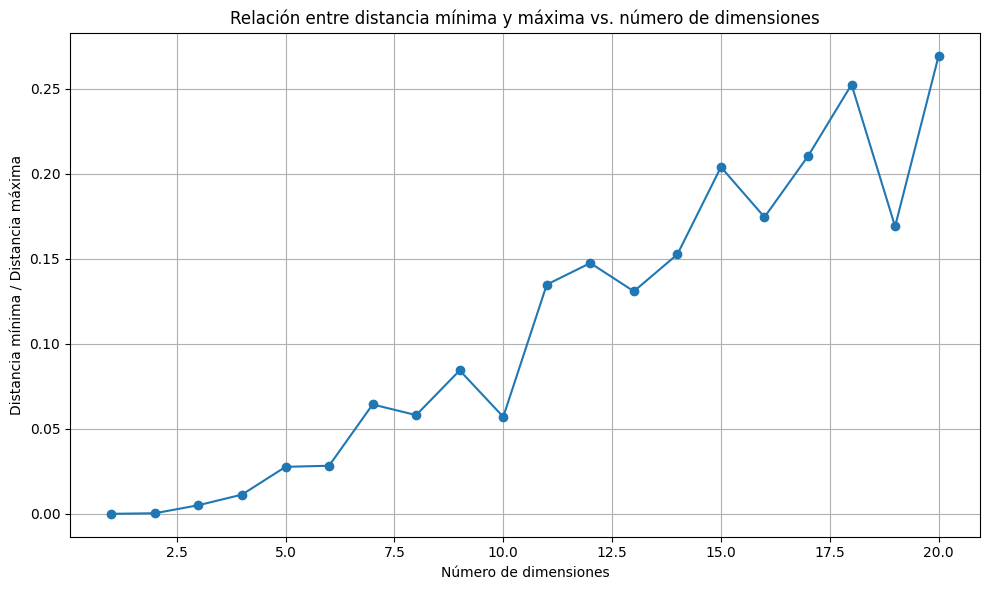

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Relación entre la distancia mínima y máxima en diferentes dimensiones
def distancia_en_dimensiones(n_dimensiones, n_puntos=1000):
    relaciones = []
    for dim in n_dimensiones:
        # Genera 1.000 puntos aleatorios en el espacio de dimensión 'dim'
        puntos = np.random.rand(n_puntos, dim)

        # Calcula todas las distancias entre pares de puntos
        distancias = []
        for i in range(n_puntos):
            for j in range(i+1, n_puntos):
                dist = np.linalg.norm(puntos[i] - puntos[j])
                distancias.append(dist)

        # Calcula la relación entre la distancia mínima y máxima
        relacion = np.min(distancias) / np.max(distancias)
        relaciones.append(relacion)
    return relaciones

# Dimensiones a evaluar (1 a 20 dimensiones)
dimensiones = list(range(1, 21))
relaciones = distancia_en_dimensiones(dimensiones)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(dimensiones, relaciones, marker='o')
plt.title('Relación entre distancia mínima y máxima vs. número de dimensiones')
plt.xlabel('Número de dimensiones')
plt.ylabel('Distancia mínima / Distancia máxima')
plt.grid(True)
plt.tight_layout()
plt.show()


 En espacios de alta dimensión, las distancias entre puntos se vuelven menos informativas. Aunque los puntos estén distribuidos aleatoriamente, todos parecen estar igual de lejos. Esto dificulta que los algoritmos que dependen de la distancia puedan funcionar bien.

# **PCA**


## Cargar dataset de Iris
**Objetivo:** Clasificar flores en tres especies de iris: Setosa, Versicolor y Virginica.

**Cantidad de registros:** 150 observaciones.

**Características (features):**
* sepal length (longitud del sépalo)
* sepal width (ancho del sépalo)
* petal length (longitud del pétalo)
* petal width (ancho del pétalo)


In [ ]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data  # características: largo/ancho de sépalo y pétalo
y = iris.target  # clases: 0=setosa, 1=versicolor, 2=virginica
target_names = iris.target_names

In [ ]:
print("Clases que podrían tomar las flores")
target_names

Clases que podrían tomar las flores


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# @title
print("Detalles geométricos de las flores:")
print("Largo Sépalo - Ancho Sépalo - Largo Pétalo - Ancho Pétalo")
iris.values()

Detalles geométricos de las flores:
Largo Sépalo - Ancho Sépalo - Largo Pétalo - Ancho Pétalo


dict_values([array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
 

## Estandarización de los datos

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)



[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

## Reducir dimensiones de 4 a 2

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca)

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

## Obtener autovectores y autovalores
* Autovectores: indican las direcciones en el espacio de los datos hacia donde se proyectan los puntos.
* Autovalores: indican cuánta varianza (información) captura cada componente.

\Proporción de varianza explicada por cada Componente:
[0.72962445 0.22850762 0.03668922 0.00517871]


<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-2801478815.py:4: SyntaxWarning: invalid escape sequence '\P'
  print("\Proporción de varianza explicada por cada Componente:")


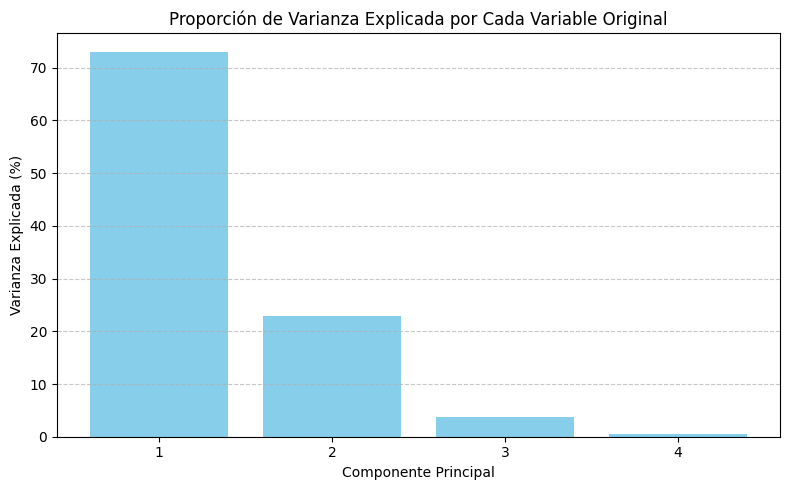

In [ ]:

pca_ori = PCA()
pca_ori.fit(X_scaled)
explained = pca_ori.explained_variance_ratio_
print("\Proporción de varianza explicada por cada Componente:")
print(explained)


plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained) + 1), explained * 100, color='skyblue')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada (%)')
plt.title('Proporción de Varianza Explicada por Cada Variable Original')
plt.xticks(range(1, len(explained) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
components = pca.components_  # autovectores: direcciones principales
explained_variance = pca.explained_variance_  # autovalores: varianza explicada por cada componente
var_comp = pca.explained_variance_ratio_

print("Direcciones Principales de cada Componente:")
print("CP1: "+str(components[0]))
print("CP2: "+str(components[1]))
print()
print("\nVarianza Explicada por cada Componente:")
print(explained_variance)
print()
print("Proporción de varianza explicada por cada CP:")
print("- Componente Principal 1, explica "+ str(round(var_comp[0],2)*100) + "% de la varianza")
print("- Componente Principal 2, explica "+ str(round(var_comp[1],2)*100) + "% de la varianza")
print("- Componente Principal 3 y 4, explicaban "+ str(round(1-var_comp[0]-var_comp[1],2)*100) + "% de la varianza")

Direcciones Principales de cada Componente:
CP1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
CP2: [0.37741762 0.92329566 0.02449161 0.06694199]


Varianza Explicada por cada Componente:
[2.93808505 0.9201649 ]

Proporción de varianza explicada por cada CP:
- Componente Principal 1, explica 73.0% de la varianza
- Componente Principal 2, explica 23.0% de la varianza
- Componente Principal 3 y 4, explicaban 4.0% de la varianza


**Direcciones Principales de cada Componente:** indican la dirección hacia donde se van a proyectar los "nuevos" ejes, las Componentes Principales 1 y 2.

**Varianza Explicada:**
Al conservar solo las dos primeras componentes, estás descartando el 4% restante de la varianza, que corresponde a las componentes PC3 y PC4.

Este pequeño porcentaje puede contener ruido o información menos relevante, por lo que en muchos casos es aceptable perderlo para lograr una representación más simple y visualizable.

## Visualización de resultados

De este modo, logramos visualizar como se agrupan las clases, en este caso las flores.

Es clave reducir la dimensionalidad, porque se puede visualizar como se generan los clusters, oportunidad que no se tendría considerando 4 dimensiones.

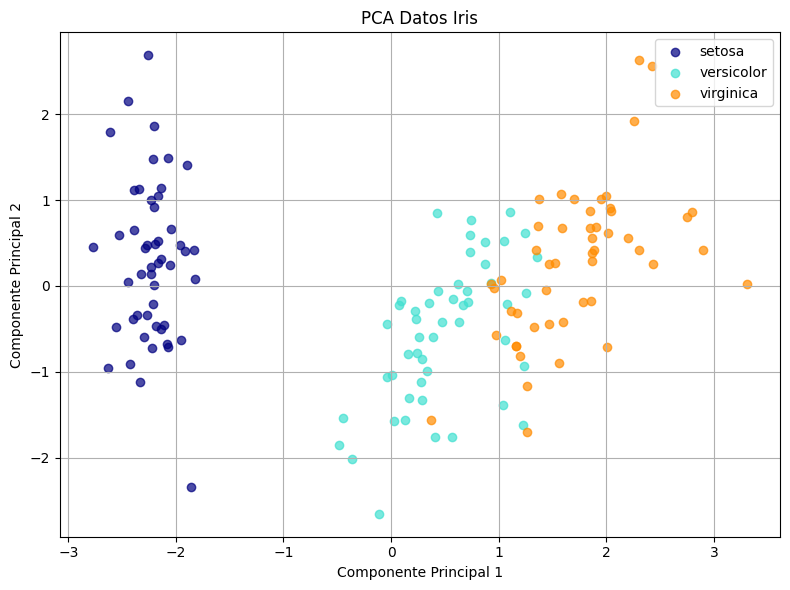

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
for i, color, label in zip([0, 1, 2], colors, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=label, alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA Datos Iris')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

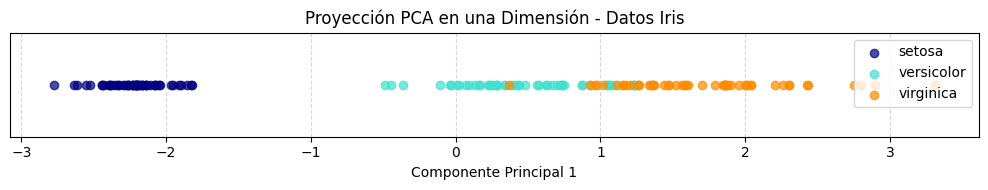

In [ ]:

# PCA a 1 dimensión
pca_1d = PCA(n_components=1)
X_pca_1d = pca_1d.fit_transform(X_scaled)

# Gráfico PCA 1D
plt.figure(figsize=(10, 2))
for i, color, label in zip([0, 1, 2], colors, target_names):
    plt.scatter(X_pca_1d[y == i], [0]*sum(y == i), color=color, label=label, alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.yticks([])
plt.title('Proyección PCA en una Dimensión - Datos Iris')
plt.legend(loc='upper right')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Esta base generalmente se utiliza para ejemplificar modelos de cluster, en este caso en particular, la clasificación la especie de la flor en base a sus medidas.

En el caso de PCA, usamos estas características para reducir la dimensionalidad y visualizar cómo se agrupan las clases.

# **t-SNE**

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


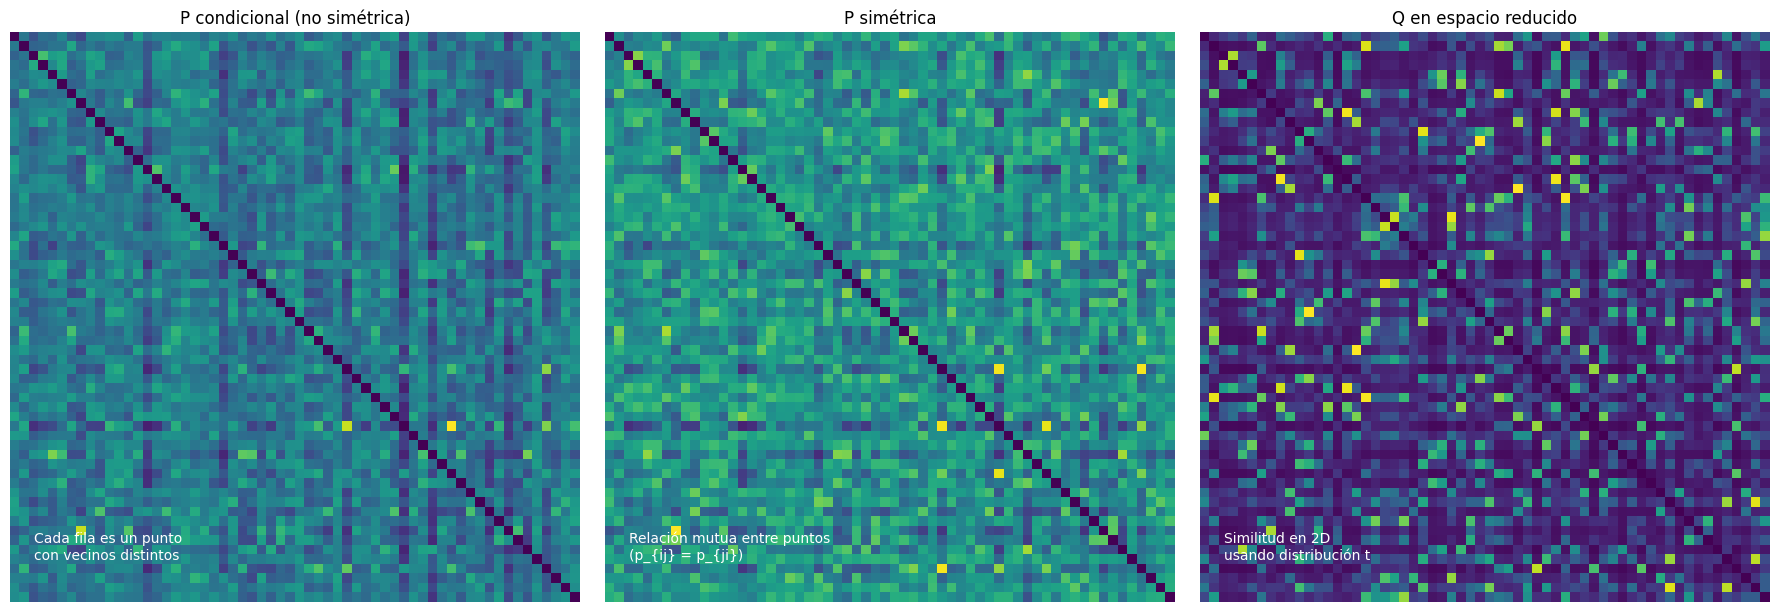

In [ ]:
# Paso 1: Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances

# Paso 2: Simular datos
np.random.seed(42)
X = np.random.normal(0, 1, (60, 5))  # 60 puntos con 5 características

# Paso 3: Calcular matriz de similitud condicional P (no simétrica)
distances = pairwise_distances(X)
sigma = np.mean(distances)
P_conditional = np.exp(-distances**2 / (2 * sigma**2))
np.fill_diagonal(P_conditional, 0)
P_conditional = P_conditional / P_conditional.sum(axis=1, keepdims=True)

# Paso 4: Simetrizar la matriz P
n = X.shape[0]
P_symmetric = (P_conditional + P_conditional.T) / (2 * n)

# Paso 5: Aplicar t-SNE para obtener matriz Q
X_tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42).fit_transform(X)
distances_low = pairwise_distances(X_tsne)
Q = 1 / (1 + distances_low**2)
np.fill_diagonal(Q, 0)
Q = Q / Q.sum()

# Paso 6: Visualizar las tres matrices
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

im0 = axs[0].imshow(P_conditional, cmap='viridis')
axs[0].set_title('P condicional (no simétrica)')
axs[0].text(2, 55, 'Cada fila es un punto\ncon vecinos distintos', color='white', fontsize=10)

im1 = axs[1].imshow(P_symmetric, cmap='viridis')
axs[1].set_title('P simétrica')
axs[1].text(2, 55, 'Relación mutua entre puntos\n(p_{ij} = p_{ji})', color='white', fontsize=10)

im2 = axs[2].imshow(Q, cmap='viridis')
axs[2].set_title('Q en espacio reducido')
axs[2].text(2, 55, 'Similitud en 2D\nusando distribución t', color='white', fontsize=10)

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


## ¿Por qué se simetriza la matriz P en t-SNE?

En t-SNE, se comparan dos matrices de similitud:

- **P**: representa las similitudes entre puntos en el espacio original (alta dimensión).
- **Q**: representa las similitudes entre puntos en el espacio reducido (2D).

Problema:
La matriz **P condicional** no es simétrica: la probabilidad de que el punto A considere a B como vecino puede ser distinta de la que B considera a A.

Solución:
Para que la comparación con **Q** sea válida, se convierte P en una **matriz simétrica.**

Esto asegura que:

- La relación entre puntos sea **mutua**.
- Ambas matrices sean **distribuciones de probabilidad**.
- Se pueda aplicar la **KL-divergencia** correctamente

 Ejemplo:
Si A considera a B como vecino (alta similitud), pero B no considera a A, la matriz condicional es asimétrica. Al simetrizarla, se obtiene una medida de similitud **mutua**, que es más justa y comparable con Q.

Visualización:
El gráfico muestra:
- P condicional (asimétrica)
- P simétrica (relación mutua)
- Q en espacio reducido (siempre simétrica)

Esto permite que t-SNE proyecte los puntos en 2D de forma coherente con sus relaciones originales.


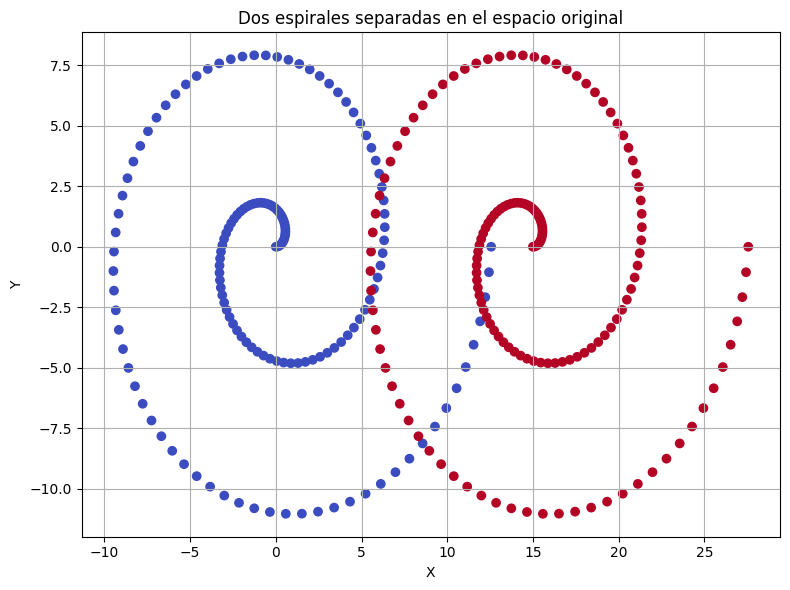

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


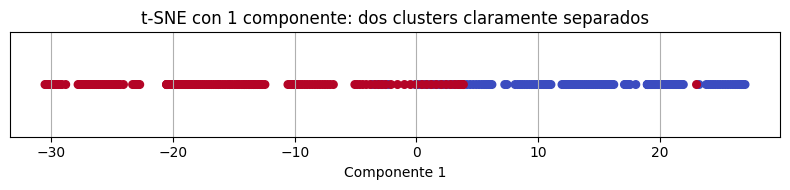

In [ ]:
from sklearn.manifold import TSNE

# Paso 2: Crear dos espirales separadas en 2D
# Espiral 1
t1 = np.linspace(0, 4 * np.pi, 150)
x1 = t1 * np.cos(t1)
y1 = t1 * np.sin(t1)
spiral1 = np.vstack((x1, y1)).T

# Espiral 2 (desplazada en X para que no se toquen)
t2 = np.linspace(0, 4 * np.pi, 150)
x2 = t2 * np.cos(t2) + 15  # desplazamiento horizontal
y2 = t2 * np.sin(t2)
spiral2 = np.vstack((x2, y2)).T

# Combinar ambas espirales en un solo conjunto de datos
X = np.vstack((spiral1, spiral2))
y = np.array([0]*150 + [1]*150)  # etiquetas para cada espiral

# Paso 3: Visualizar los datos en su espacio original
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Dos espirales separadas en el espacio original')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.tight_layout()
plt.show()

# Paso 4: Aplicar t-SNE para reducir a 1 dimensión
# Esto permite visualizar los clusters como una línea
X_tsne = TSNE(n_components=1, perplexity=30, learning_rate=200, n_iter=1000, random_state=42).fit_transform(X)

# Paso 5: Visualizar el resultado de t-SNE en 1D
plt.figure(figsize=(8, 2))
plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='coolwarm', s=30)
plt.title('t-SNE con 1 componente: dos clusters claramente separados')
plt.xlabel('Componente 1')
plt.yticks([])
plt.grid(True)
plt.tight_layout()
plt.show()


# UMAP
Ejemplo: Edad vs Ingreso Mensual.
Tres clusters:
* Grupo 1: Jóvenes con ingresos bajos.
* Grupo 2: Adultos con ingresos medios.
* Grupo 3: Mayores con ingresos altos.


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


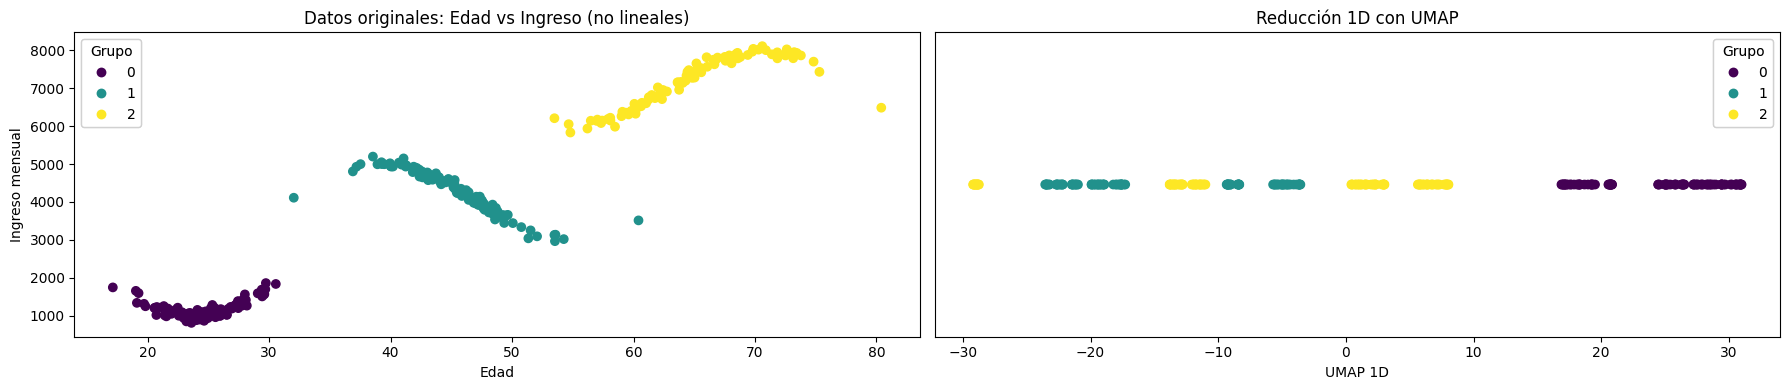

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap  # Asegúrate de tener umap-learn instalado

# Simular tres grupos no lineales con variables observables: edad e ingreso
np.random.seed(42)

# Grupo 1: jóvenes con ingresos bajos, curvados
edad1 = np.random.normal(loc=25, scale=3, size=100)
ingreso1 = np.sin(edad1 / 5) * 1000 + 2000 + np.random.normal(0, 100, size=100)

# Grupo 2: adultos con ingresos medios, curvados
edad2 = np.random.normal(loc=45, scale=4, size=100)
ingreso2 = np.sin(edad2 / 5) * 1000 + 4000 + np.random.normal(0, 100, size=100)

# Grupo 3: mayores con ingresos altos, curvados
edad3 = np.random.normal(loc=65, scale=5, size=100)
ingreso3 = np.sin(edad3 / 5) * 1000 + 7000 + np.random.normal(0, 100, size=100)

# Combinar los datos
edad = np.concatenate([edad1, edad2, edad3])
ingreso = np.concatenate([ingreso1, ingreso2, ingreso3])
data = np.vstack((edad, ingreso)).T
labels = np.array([0]*100 + [1]*100 + [2]*100)

# Aplicar PCA y UMAP para reducir a 1D
#pca = PCA(n_components=1)
#data_pca = pca.fit_transform(data)

reducer = umap.UMAP(n_components=1, random_state=42)
data_umap = reducer.fit_transform(data)

# Visualizar los resultados
fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Datos originales
scatter0 = axs[0].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
axs[0].set_title('Datos originales: Edad vs Ingreso (no lineales)')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Ingreso mensual')
legend0 = axs[0].legend(*scatter0.legend_elements(), title="Grupo")
axs[0].add_artist(legend0)

# Reducción con UMAP
scatter2 = axs[1].scatter(data_umap, np.zeros_like(data_umap), c=labels, cmap='viridis')
axs[1].set_title('Reducción 1D con UMAP')
axs[1].set_xlabel('UMAP 1D')
axs[1].set_yticks([])
legend2 = axs[1].legend(*scatter2.legend_elements(), title="Grupo")
axs[1].add_artist(legend2)

plt.tight_layout()
plt.show()

# Selección de variables

## Filter Methods

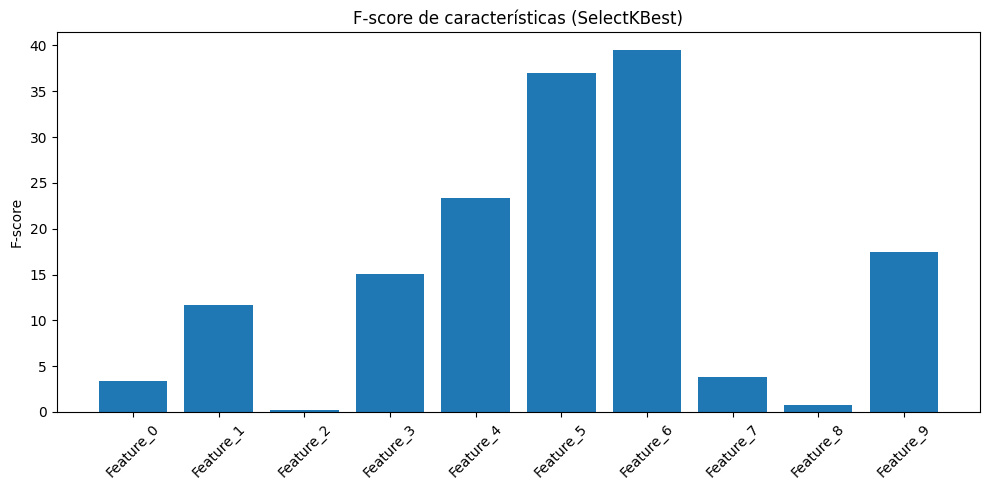

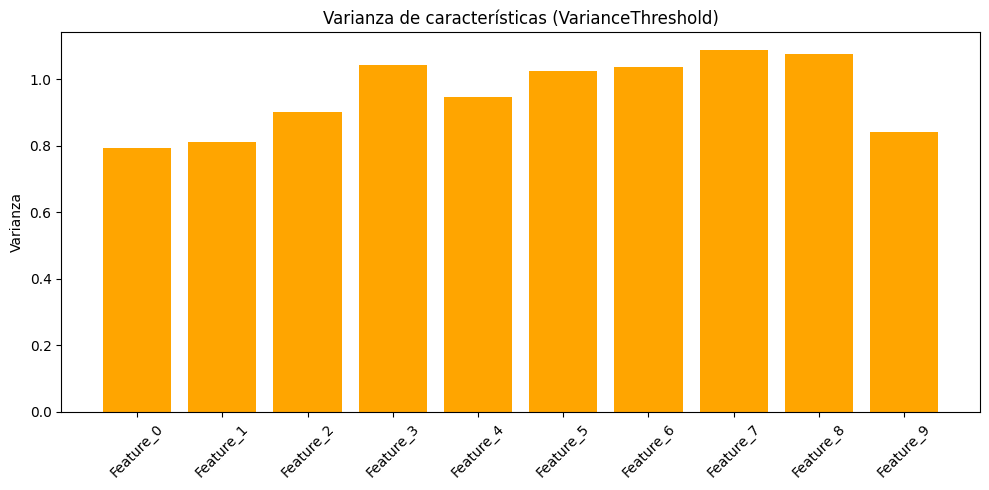

Características seleccionadas por SelectKBest (top 5):
['Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_9']


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9
0,3.355943,11.676637,0.227357,15.025574,23.323093,37.036157,39.457052,3.769476,0.746585,17.488957



Características seleccionadas por VarianceThreshold (var > 1.0):
['Feature_3', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8']


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9
0,0.79177,0.809487,0.902246,1.042888,0.944641,1.02304,1.035351,1.08599,1.076376,0.841273


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression, VarianceThreshold
import pandas as pd

# Crear el dataset sintético
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

# Método de filtro: SelectKBest con f_regression (top 5)
selector_kbest = SelectKBest(score_func=f_regression, k=5)
selector_kbest.fit(X, y)
kbest_scores = selector_kbest.scores_
kbest_selected = selector_kbest.get_support(indices=True)
kbest_features = [feature_names[i] for i in kbest_selected]

# Método de filtro: VarianceThreshold (umbral = 1.0)
selector_var = VarianceThreshold(threshold=1.0)
selector_var.fit(X)
variances = selector_var.variances_
var_selected = selector_var.get_support(indices=True)
var_features = [feature_names[i] for i in var_selected]

# Graficar puntuaciones de SelectKBest
plt.figure(figsize=(10, 5))
plt.bar(range(len(kbest_scores)), kbest_scores, align="center")
plt.xticks(range(len(kbest_scores)), feature_names, rotation=45)
plt.title("F-score de características (SelectKBest)")
plt.ylabel("F-score")
plt.tight_layout()
plt.show()

# Graficar varianzas de VarianceThreshold
plt.figure(figsize=(10, 5))
plt.bar(range(len(variances)), variances, align="center", color='orange')
plt.xticks(range(len(variances)), feature_names, rotation=45)
plt.title("Varianza de características (VarianceThreshold)")
plt.ylabel("Varianza")
plt.tight_layout()
plt.show()

# Mostrar resultados
print("Características seleccionadas por SelectKBest (top 5):")
print(kbest_features)
aux1 = pd.DataFrame(data=[kbest_scores.tolist()], columns =feature_names)
display(aux1)

print("\nCaracterísticas seleccionadas por VarianceThreshold (var > 1.0):")
print(var_features)
aux2 = pd.DataFrame(data=[variances.tolist()], columns =feature_names)
display(aux2)

## Embedded Methods
### Lasso L1

Características originales:
['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9']

Características seleccionadas por Lasso con alpha=5.0:
['Feature_0', 'Feature_1', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9']

Número de características originales: 10
Número de características seleccionadas: 9


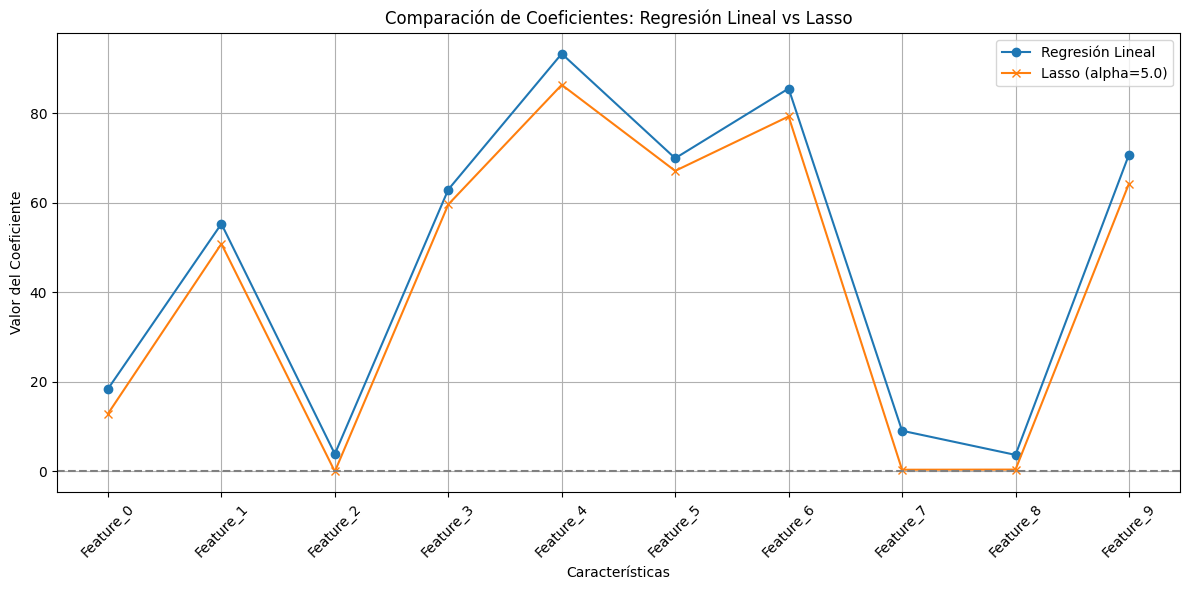

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_regression

# Crear datos sintéticos
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

# Regresión lineal
lr = LinearRegression()
lr.fit(X, y)
coef_lr = lr.coef_

# Lasso con penalización alta
lasso = Lasso(alpha=5.0)
lasso.fit(X, y)
coef_lasso = lasso.coef_

# Mostrar características seleccionadas
selected_features = [name for name, coef in zip(feature_names, coef_lasso) if coef != 0]

print("Características originales:")
print(feature_names)
print("\nCaracterísticas seleccionadas por Lasso con alpha=5.0:")
print(selected_features)
print(f"\nNúmero de características originales: {len(feature_names)}")
print(f"Número de características seleccionadas: {len(selected_features)}")

# Gráfico comparativo de coeficientes
plt.figure(figsize=(12, 6))
plt.plot(coef_lr, label='Regresión Lineal', marker='o')
plt.plot(coef_lasso, label='Lasso (alpha=5.0)', marker='x')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(ticks=range(len(feature_names)), labels=feature_names, rotation=45)
plt.title('Comparación de Coeficientes: Regresión Lineal vs Lasso')
plt.xlabel('Características')
plt.ylabel('Valor del Coeficiente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
coef_lasso

array([12.89869437, 50.84710786,  0.        , 59.63785863, 86.35083455,
       67.137321  , 79.28775471,  0.39284693,  0.42549841, 64.27798133])

La diferencia entre los coeficientes de una regresión lineal y los de una regresión Lasso (L1) radica en cómo se ajustan y en el efecto que tienen sobre la selección de variables y la regularización del modelo.

**Regresión Lineal:** Minimizar el error cuadrático entre las predicciones y los valores reales. Coeficientes, se ajustan libremente para minimizar el error, sin penalización.

**Lasso:** Minimizar el error + una penalización. Algunos coeficientes, se reducen a exactamente cero, lo que equivale a eliminar variables.

Vemos que Feature_2 tiene un coeficiente 0 y por lo tanto es eliminada por su baja relevancia al modelo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

# Crear datos sintéticos
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# Modelo con todas las variables
lr_full = LinearRegression()
lr_full.fit(X, y)
y_pred_full = lr_full.predict(X)
mse_full = mean_squared_error(y, y_pred_full)
r2_full = r2_score(y, y_pred_full)

# Modelo con variables seleccionadas por Lasso
lasso = Lasso(alpha=5.0)
lasso.fit(X, y)
selected_indices = [i for i, coef in enumerate(lasso.coef_) if coef != 0]
X_selected = X[:, selected_indices]
lr_selected = LinearRegression()
lr_selected.fit(X_selected, y)
y_pred_selected = lr_selected.predict(X_selected)
mse_selected = mean_squared_error(y, y_pred_selected)
r2_selected = r2_score(y, y_pred_selected)

# Crear gráfico de barras comparativo
labels = ['R²', 'MSE']
full_model = [r2_full, mse_full]
selected_model = [r2_selected, mse_selected]

print(f"R² Modelo con todas las variables: {round(r2_full,3)}")
print(f"MSE Modelo con todas las variables: {round(mse_full,0)}")
print("-------------------------------------------------")
print(f"R² Modelo con las variables seleccionadas: {round(r2_selected,3)}")
print(f"MSE Modelo con las variables seleccionadas: {round(mse_selected,0)}")


R² Modelo con todas las variables: 0.997
MSE Modelo con todas las variables: 93.0
-------------------------------------------------
R² Modelo con las variables seleccionadas: 0.997
MSE Modelo con las variables seleccionadas: 105.0


Este resultado confirma que Lasso simplifica el modelo con una mínima pérdida de rendimiento, lo que lo hace ideal para casos donde se busca interpretabilidad y eficiencia sin comprometer demasiado la precisión.

#Random Forest Feature Relevance
Aplicamos random forest al mismo data set para medir el rankeo de las variables.


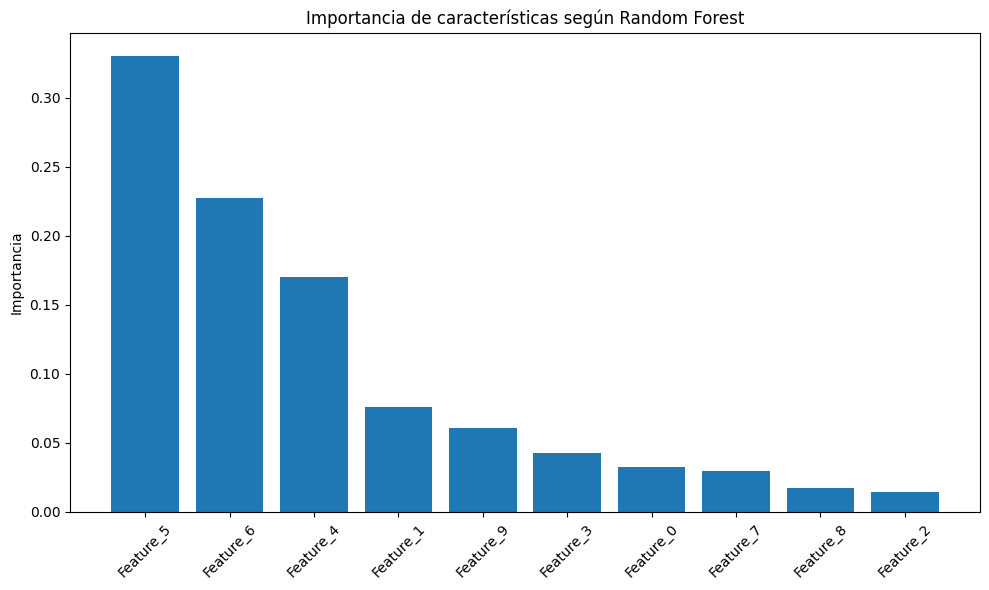

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener importancias de características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Graficar importancias
plt.figure(figsize=(10, 6))
plt.title("Importancia de características según Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

Random Forest rankea las variables según su contribución al modelo. Aunque no elimina variables automáticamente, esta información puede usarse para hacer selección manual o automática.

Se observa que la variable menos relevante es Feature_2 que es aquella que Lasso eliminó.

##Wrapped Method
Vamos a evaluar el método de RFE (Recursive Feature Elimination) con regresión lineal y pediremos que se quede con 8 de las 10 variables.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import RFE
from sklearn.datasets import make_regression

# Crear datos sintéticos
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

# RFE con regresión lineal
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe.fit(X, y)
rfe_support = pd.Series(rfe.support_, index=feature_names, name="RFE_Selected")

# Combinar resultados
results = rfe_support
print("Selección por RFE:") #RFE es Backward Elimination
print()
df_results = pd.DataFrame(results)
display(df_results[df_results['RFE_Selected']==True])
print("Se elimina Feature_2 y Feature_8" )

X_df = pd.DataFrame(X, columns=feature_names)
selected_features = df_results[df_results['RFE_Selected'] == True].index.to_list()
X_rfe = X_df[selected_features].copy()
display(X_rfe.head())

# Modelo con todas las variables
model_full = LinearRegression()
model_full.fit(X, y)
y_pred_full = model_full.predict(X)
r2_full = r2_score(y, y_pred_full)
rmse_full = mean_squared_error(y, y_pred_full)

# Modelo con variables seleccionadas por RFE
model_rfe = LinearRegression()
model_rfe.fit(X_rfe, y)
y_pred_rfe = model_rfe.predict(X_rfe)
r2_rfe = r2_score(y, y_pred_rfe)
rmse_rfe = mean_squared_error(y, y_pred_rfe)
print()
print("------------------------------------------------")
print()

# Mostrar comparación
print("Comparación de rendimiento del modelo:")
print(f"Modelo con todas las variables - R²: {r2_full:.4f}, RMSE: {rmse_full:.4f}")
print(f"Modelo con RFE (8 variables)     - R²: {r2_rfe:.4f}, RMSE: {rmse_rfe:.4f}")

Selección por RFE:



,RFE_Selected
Feature_0,True
Feature_1,True
Feature_3,True
Feature_4,True
Feature_5,True
Feature_6,True
Feature_7,True
Feature_9,True


Se elimina Feature_2 y Feature_8


,Feature_0,Feature_1,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_9
0,-0.926930,-1.430141,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.440044
1,0.202923,0.334457,1.547505,-0.387702,1.795878,2.010205,-1.515744,0.658544
2,-0.241236,0.456753,-1.251539,1.117296,1.443765,0.447709,0.352055,0.569767
3,0.289775,-1.008086,0.871125,-0.408075,-0.326024,-0.351513,2.075401,-1.870792
4,-0.007973,-0.190339,0.077368,0.538910,-0.861284,-1.382800,1.479944,-0.875618



------------------------------------------------

Comparación de rendimiento del modelo:
Modelo con todas las variables - R²: 0.9974, RMSE: 92.6124
Modelo con RFE (8 variables)     - R²: 0.9968, RMSE: 116.9824


RFE con 8 variables logra un excelente equilibrio entre simplicidad y precisión.

Este Selector Secuencial de Características agrega (selección hacia adelante) o elimina (eliminación hacia atrás) características para formar un subconjunto de variables de manera codiciosa (greedy). En cada etapa, este estimador elige la mejor característica para agregar o eliminar en función del puntaje de validación cruzada de un estimador.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Modelo base
model = LinearRegression()

# Forward Selection
sfs = SFS(estimator=model,
          k_features=5,  # número de variables
          forward=True,       # esto activa Forward Selection
          scoring='r2',       # métrica de evaluación
          )

sfs = sfs.fit(X, y)

# Ver las variables seleccionadas
print('Features seleccionadas:', sfs.k_feature_names_)

Features seleccionadas: ('3', '4', '5', '6', '9')


In [ ]:

# Backward Selection
sfs = SFS(estimator=model,
          k_features=5,  # número de variables
          forward=False,       # esto activa Backward Selection
          scoring='r2',       # métrica de evaluación
          )

sfs = sfs.fit(X, y)

# Ver las variables seleccionadas
print('Features seleccionadas:', sfs.k_feature_names_)

Features seleccionadas: ('3', '4', '5', '6', '9')
